In [2]:
# data collection

In [3]:
import pandas as pd
import numpy as np
import random
from faker import Faker

fake = Faker()
np.random.seed(42)
Faker.seed(42)

n = 200_000

locations = ['Bangalore', 'Mumbai', 'Delhi', 'Hyderabad', 'Chennai', 'Kolkata']
genders = ['Male', 'Female', 'Other']
devices = ['Mobile', 'Desktop', 'Tablet']
categories = ['Electronics', 'Fashion', 'Home', 'Books', 'Beauty']
engines = ['Old', 'New']

data = {
    "User_ID": [fake.uuid4() for _ in range(n)],
    "Session_ID": [fake.uuid4() for _ in range(n)],
    "Age": np.random.randint(18, 65, size=n),
    "Gender": [random.choice(genders) for _ in range(n)],
    "Device_Type": [random.choice(devices) for _ in range(n)],
    "Location": [random.choice(locations) for _ in range(n)],
    "Time_Spent": np.round(np.random.normal(loc=300, scale=100, size=n), 2),  # seconds
    "Pages_Viewed": np.random.randint(1, 20, size=n),
    "Recommended_Product_Category": [random.choice(categories) for _ in range(n)],
    "Recommendation_Engine": [random.choices(engines, weights=[0.5, 0.5])[0] for _ in range(n)],
    "Converted": [random.choices([0, 1], weights=[0.7, 0.3])[0] for _ in range(n)]
}

df = pd.DataFrame(data)
df.to_csv("recommender_conversion_data.csv", index=False)
print("✅ Data generated and saved as 'recommender_conversion_data.csv'")


✅ Data generated and saved as 'recommender_conversion_data.csv'


In [1]:
# data cleaning
import pandas as pd

df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\new recommender(AB testing)\\recommender_conversion_data.csv')


df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   User_ID                       200000 non-null  object 
 1   Session_ID                    200000 non-null  object 
 2   Age                           200000 non-null  int64  
 3   Gender                        200000 non-null  object 
 4   Device_Type                   200000 non-null  object 
 5   Location                      200000 non-null  object 
 6   Time_Spent                    200000 non-null  float64
 7   Pages_Viewed                  200000 non-null  int64  
 8   Recommended_Product_Category  200000 non-null  object 
 9   Recommendation_Engine         200000 non-null  object 
 10  Converted                     200000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 16.8+ MB


,Age,Time_Spent,Pages_Viewed,Converted
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,40.986130,300.119571,9.992750,0.300555
std,13.541454,99.833798,5.476543,0.458501
min,18.000000,-99.170000,1.000000,0.000000
25%,29.000000,232.697500,5.000000,0.000000
50%,41.000000,300.190000,10.000000,0.000000
75%,53.000000,367.330000,15.000000,1.000000
max,64.000000,758.440000,19.000000,1.000000


In [6]:
df.head(10)

,User_ID,Session_ID,Age,Gender,Device_Type,Location,Time_Spent,Pages_Viewed,Recommended_Product_Category,Recommendation_Engine,Converted
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,b495f2f0-a795-4586-a675-b52c2d1b49cb,56,Female,Tablet,Bangalore,92.32,6,Home,Old,1
1,23b8c1e9-3924-46de-beb1-3b9046685257,63a9be83-4dd8-4a3e-8461-1ff667ecd664,46,Female,Mobile,Bangalore,356.93,13,Home,Old,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,47bce843-1cdd-4b0f-9e32-f13d6a3e1108,32,Female,Mobile,Delhi,457.26,2,Fashion,New,0
3,972a8469-1641-4f82-8b9d-2434e465e150,1a70a875-b711-417f-ae4f-39b0822d40fc,60,Male,Desktop,Chennai,428.85,19,Home,Old,1
4,17fc695a-07a0-4a6e-8822-e8f36c031199,196e92ec-eb55-4fdb-8da9-eaa76ff3ef38,25,Other,Tablet,Bangalore,254.33,2,Fashion,Old,1
5,9a1de644-815e-46d1-bb8f-aa1837f8a88b,af49c331-5e84-4204-8e92-ed3dc36ddd74,38,Male,Tablet,Bangalore,97.34,11,Home,New,0
6,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,079116fc-a8c8-418e-b624-caaaf6c81841,56,Other,Desktop,Chennai,321.67,11,Electronics,New,1
7,6b65a6a4-8b81-48f6-b38a-088ca65ed389,fd5432c0-683e-478e-9981-aa32dba179d1,36,Other,Tablet,Hyderabad,327.95,8,Electronics,Old,1
8,47378190-96da-4dac-b2ff-5d2a386ecbe0,3cf507db-434c-4366-aa8c-d87f9f87fddb,40,Male,Tablet,Hyderabad,383.78,8,Fashion,New,1
9,c241330b-01a9-471f-9e8a-774bcf36d58b,ed32c961-96d3-40b3-b6cd-b40673868a23,28,Male,Desktop,Hyderabad,342.27,15,Electronics,Old,0


In [8]:


# Drop duplicates
df.drop_duplicates(inplace=True)

# Remove unrealistic time spent
df = df[df["Time_Spent"] > 0]

# Reset index
df.reset_index(drop=True, inplace=True)

df.to_csv("cleaned_conversion_data.csv", index=False)
print(" Data cleaned and saved as 'cleaned_conversion_data.csv'")


 Data cleaned and saved as 'cleaned_conversion_data.csv'


In [9]:
# data quality

In [10]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\new recommender(AB testing)\\cleaned_conversion_data.csv')

print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nUnique values:\n", df.nunique())
print("\nBasic stats:\n", df.describe())


Missing values:
 User_ID                         0
Session_ID                      0
Age                             0
Gender                          0
Device_Type                     0
Location                        0
Time_Spent                      0
Pages_Viewed                    0
Recommended_Product_Category    0
Recommendation_Engine           0
Converted                       0
dtype: int64

Data types:
 User_ID                          object
Session_ID                       object
Age                               int64
Gender                           object
Device_Type                      object
Location                         object
Time_Spent                      float64
Pages_Viewed                      int64
Recommended_Product_Category     object
Recommendation_Engine            object
Converted                         int64
dtype: object

Unique values:
 User_ID                         199739
Session_ID                      199739
Age                              

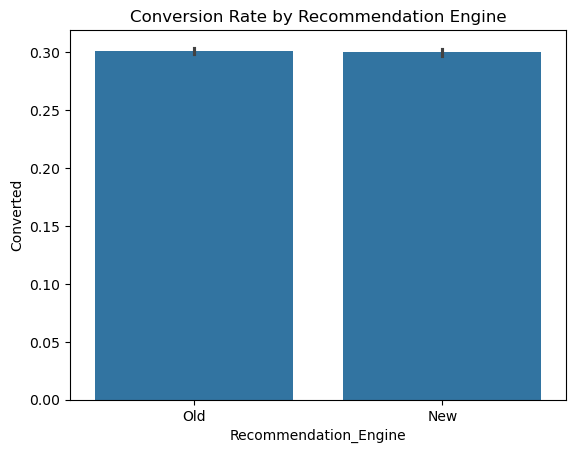

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt



# Conversion rate by engine
sns.barplot(data=df, x="Recommendation_Engine", y="Converted")
plt.title("Conversion Rate by Recommendation Engine")
plt.show()



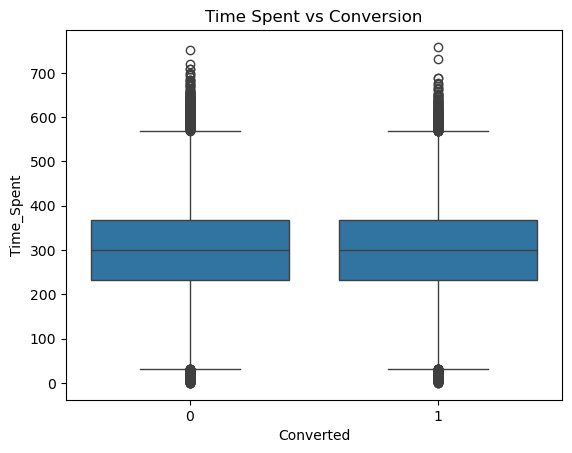

In [12]:
# Time spent vs conversion
sns.boxplot(data=df, x="Converted", y="Time_Spent")
plt.title("Time Spent vs Conversion")
plt.show()




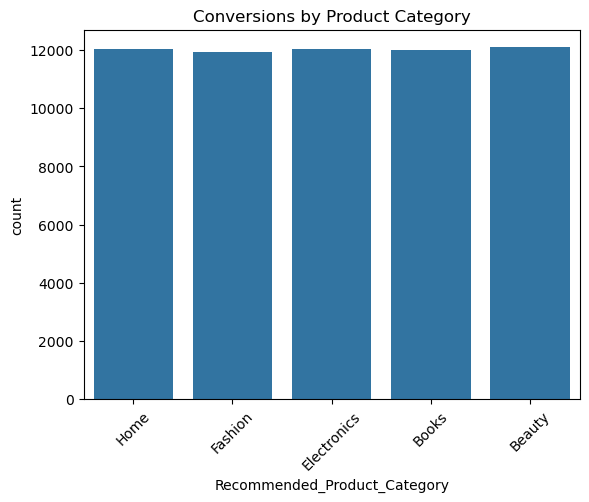

In [13]:
# Conversion by category
sns.countplot(data=df[df["Converted"] == 1], x="Recommended_Product_Category")
plt.title("Conversions by Product Category")
plt.xticks(rotation=45)
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

df = pd.read_csv("cleaned_conversion_data.csv")

# Encode categorical features
le = LabelEncoder()
for col in ["Gender", "Device_Type", "Location", "Recommended_Product_Category", "Recommendation_Engine"]:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["User_ID", "Session_ID", "Converted"])
y = df["Converted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

pickle.dump(model, open("conversion_model.pkl", "wb"))
print(" Model trained and saved as 'conversion_model.pkl'")


✅ Model trained and saved as 'conversion_model.pkl'


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   User_ID                       200000 non-null  object 
 1   Session_ID                    200000 non-null  object 
 2   Age                           200000 non-null  int64  
 3   Gender                        200000 non-null  object 
 4   Device_Type                   200000 non-null  object 
 5   Location                      200000 non-null  object 
 6   Time_Spent                    200000 non-null  float64
 7   Pages_Viewed                  200000 non-null  int64  
 8   Recommended_Product_Category  200000 non-null  object 
 9   Recommendation_Engine         200000 non-null  object 
 10  Converted                     200000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 16.8+ MB
